In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading in the data
df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [3]:
# checking to see whether the data was loaded correctly
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [4]:
# renaming the 2 columns so that it makes a little more sense.
col_rename = {'X': 'Lat', 'Y': 'Lon'}

In [5]:
df = df.rename(columns=col_rename)

In [6]:
# dropping unnecessary columns
df = df.drop((['IncidntNum', 'Location', 'PdId']), axis = 1)

In [7]:
# sorting the dataframe by the date so that is starts on January 1, and ends on December 31.
df.sort_values(by=['Date'], ascending=True, inplace=True)

In [8]:
df.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Lat,Lon
139947,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Friday,01/01/2016 12:00:00 AM,00:01,TARAVAL,NONE,1200 Block of 9TH AV,-122.466306,37.764966
26883,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",Friday,01/01/2016 12:00:00 AM,00:09,MISSION,NONE,400 Block of VALENCIA ST,-122.421935,37.766134
26884,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Friday,01/01/2016 12:00:00 AM,00:09,MISSION,NONE,400 Block of VALENCIA ST,-122.421935,37.766134
26885,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE,Friday,01/01/2016 12:00:00 AM,00:07,NORTHERN,"ARREST, BOOKED",POLK ST / CEDAR ST,-122.419835,37.786358
26886,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Friday,01/01/2016 12:00:00 AM,00:07,NORTHERN,"ARREST, BOOKED",POLK ST / CEDAR ST,-122.419835,37.786358


In [9]:
# making sure that the date is in the correct format
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# setting the date to year/month/day
df['Date'] = df['Date'].dt.strftime('%Y/%m/%d')

In [11]:
# setting category as the index
# df = df.set_index('Date')

In [12]:
# checking on the changes that I made to the dataframe
df.sample(5)

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Lat,Lon
12374,OTHER OFFENSES,POSSESSION OF BURGLARY TOOLS,Monday,2016/04/25,18:43,BAYVIEW,"ARREST, BOOKED",1500 Block of CUSTER AV,-122.390183,37.745796
142734,NON-CRIMINAL,LOST PROPERTY,Friday,2016/03/11,13:00,RICHMOND,NONE,4800 Block of GEARY BL,-122.471250,37.780579
88236,ASSAULT,BATTERY,Thursday,2016/10/20,12:30,BAYVIEW,NONE,300 Block of RHODEISLAND ST,-122.402692,37.765411
93288,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Sunday,2016/11/06,01:54,MISSION,NONE,3100 Block of 18TH ST,-122.414520,37.762183
74694,BURGLARY,"BURGLARY,STORE UNDER CONSTRUCTION, UNLAWFUL ENTRY",Friday,2016/09/09,17:15,SOUTHERN,NONE,300 Block of BRYANT ST,-122.392453,37.783894


In [13]:
# checking to see if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150500 entries, 139947 to 149155
Data columns (total 10 columns):
Category      150500 non-null object
Descript      150500 non-null object
DayOfWeek     150500 non-null object
Date          150500 non-null object
Time          150500 non-null object
PdDistrict    150499 non-null object
Resolution    150500 non-null object
Address       150500 non-null object
Lat           150500 non-null float64
Lon           150500 non-null float64
dtypes: float64(2), object(8)
memory usage: 12.6+ MB


In [14]:
# there is only one missing value for the entire dataframe under the PdDistrict column. we will use a ffill.
df['PdDistrict'] = df['PdDistrict'].ffill()

In [15]:
# checking to see whether the missing value was filled or not. It was.
df['PdDistrict'].isnull().sum()

0

# Descript

In [16]:
df['Descript'].value_counts()

GRAND THEFT FROM LOCKED AUTO             17741
LOST PROPERTY                             4596
AIDED CASE, MENTAL DISTURBED              4566
PETTY THEFT OF PROPERTY                   4416
MALICIOUS MISCHIEF, VANDALISM             4262
                                         ...  
DEATH, NON-MANSLAUGHTER AUTO ACCIDENT        1
GRAND THEFT BY PROSTITUTE                    1
PROCUREMENT, PIMPING, & PANDERING            1
MONEY LAUNDERING                             1
ATTEMPTED RAPE WITH A GUN                    1
Name: Descript, Length: 726, dtype: int64

# Category

In [17]:
# counting the different categories withing the crime category column
catcount = pd.crosstab(index=df['Category'], columns='count')

In [18]:
catcount['count'].sort_values(ascending = False)

Category
LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                 

In [19]:
# there are a lot of crimes for the year 2016 that happened less than 1000 times. to make things easier on ourselves 
# we will look at only the crimes that have occurred more than 1000 times over the course of the year.
# LARCENY/THEFT                  40409
# OTHER OFFENSES                 19599
# NON-CRIMINAL                   17866
# ASSAULT                        13577
# VANDALISM                       8589
# VEHICLE THEFT                   6419
# WARRANTS                        5914
# BURGLARY                        5802
# SUSPICIOUS OCC                  5782
# MISSING PERSON                  4338
# DRUG/NARCOTIC                   4243
# ROBBERY                         3299
# FRAUD                           2635
# SECONDARY CODES                 1841
# TRESPASS                        1812
# WEAPON LAWS                     1658

In [20]:
cat = catcount.drop(['TREA', 'PORNOGRAPHY/OBSCENE MAT', 'GAMBLING', 'BAD CHECKS', 'SEX OFFENSES, NON FORCIBLE', 'LOITERING',
              'FAMILY OFFENSES', 'EXTORTION', 'SUICIDE', 'BRIBERY', 'RUNAWAY', 'EMBEZZLEMENT', 'LIQUOR LAWS',
              'SEX OFFENSES, FORCIBLE', 'STOLEN PROPERTY', 'RECOVERED VEHICLE', 'DISORDERLY CONDUCT', 'PROSTITUTION',
               'FORGERY/COUNTERFEITING', 'DRUNKENNESS', 'DRIVING UNDER THE INFLUENCE', 'ARSON', 'KIDNAPPING'],
                axis = 0)

In [21]:
cat.head(16)

col_0,count
Category,
ASSAULT,13577
BURGLARY,5802
DRUG/NARCOTIC,4243
FRAUD,2635
LARCENY/THEFT,40409
MISSING PERSON,4338
NON-CRIMINAL,17866
OTHER OFFENSES,19599
ROBBERY,3299


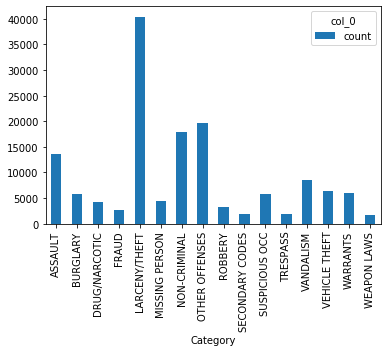

In [22]:
# after dropping everything that occured less than 1000 times over the course of the year, 
# we are left with 16 categories of crimes. Larceny and theft are the highest occuring crimes in SF for 2016.
cat.plot(kind='bar');

# Descript

In [23]:
df['Descript'].value_counts(ascending = False)

GRAND THEFT FROM LOCKED AUTO             17741
LOST PROPERTY                             4596
AIDED CASE, MENTAL DISTURBED              4566
PETTY THEFT OF PROPERTY                   4416
MALICIOUS MISCHIEF, VANDALISM             4262
                                         ...  
DEATH, NON-MANSLAUGHTER AUTO ACCIDENT        1
GRAND THEFT BY PROSTITUTE                    1
PROCUREMENT, PIMPING, & PANDERING            1
MONEY LAUNDERING                             1
ATTEMPTED RAPE WITH A GUN                    1
Name: Descript, Length: 726, dtype: int64

In [24]:
desc = df['Descript'].value_counts(ascending = False)

In [25]:
# there are 726 different descriptions for the crimes that were commited. If we look at the top to descriptions of
# crimes, we will see that (in my opinion) 4/10 of these descriptions correlate with the larceny/theft category of 
# SF crimes in 2016. obviously this makes sense.
desc.head(10)

GRAND THEFT FROM LOCKED AUTO             17741
LOST PROPERTY                             4596
AIDED CASE, MENTAL DISTURBED              4566
PETTY THEFT OF PROPERTY                   4416
MALICIOUS MISCHIEF, VANDALISM             4262
BATTERY                                   4211
PETTY THEFT FROM LOCKED AUTO              3994
STOLEN AUTOMOBILE                         3603
DRIVERS LICENSE, SUSPENDED OR REVOKED     3376
WARRANT ARREST                            3089
Name: Descript, dtype: int64

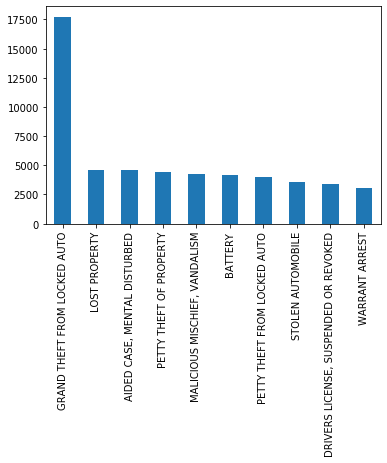

In [26]:
desc.head(10).plot(kind = 'bar');

# DayOfWeek

In [27]:
# I want to check to see what day of the week crimes are most likely to occur. 
df['DayOfWeek'].value_counts()

Friday       23371
Saturday     22172
Thursday     21395
Wednesday    21332
Tuesday      21242
Monday       20783
Sunday       20205
Name: DayOfWeek, dtype: int64

In [28]:
# Not surprisingly, Friday, Saturday, and Thursday are the days with the most crimes commited but it is fairly even 
# accross the seven days of the week.
day = pd.crosstab(index=df['DayOfWeek'], columns='count')

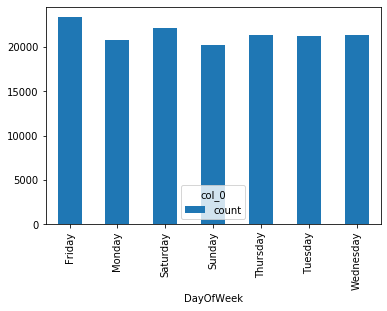

In [29]:
day.plot(kind = 'bar');

# Date

In [30]:
# is there a specific date that crimes occur the most or the least?
# date = pd.crosstab(index=df['Date'], columns='count')
date = df['Date'].value_counts()
date.head()

2016/01/01    558
2016/10/08    532
2016/04/01    525
2016/01/29    514
2016/12/14    507
Name: Date, dtype: int64

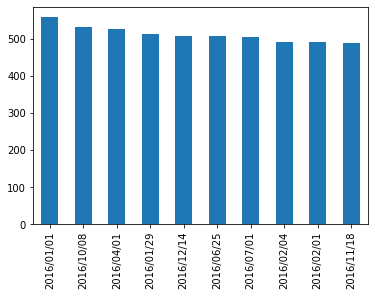

In [31]:
# here we can see the 10 "biggest" days for crime in SF. I do not think it is a surprise that New Years is the day 
# with the highest amount of crime
date.head(10).plot(kind = 'bar');

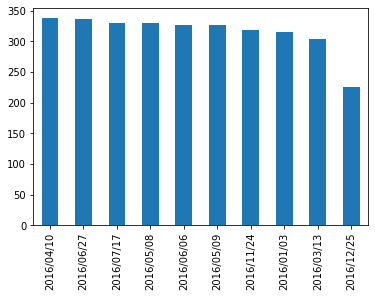

In [32]:
# here are the 10 days with the lowest amount of crime. Again, I do not think it is a surprise that christmas is the
# day with the least amount of crime.
date.tail(10).plot(kind = 'bar');

# Time

In [33]:
# Due to limitations in the data, time is a hard thing to nail down. Officers/data entry people have either rounded
# the time to the nearest hour, or entered in the data precisely.
time = df['Time'].value_counts()

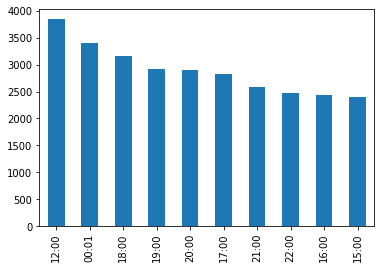

In [34]:
#looking at the graph of the 10 times that occur the most.
# I think that it is interesting (given the data) that most of the crimes occur in the late afternoon. i would assume
# most crimes would have happened during the early hours of the morning.

# military time
time.head(10).plot(kind = 'bar');

# PdDistrict

In [35]:
# now lets take a look at which police department is called upon the most.
dist = df['PdDistrict'].value_counts()

In [36]:
# as we can clearly see from the numbers and graph below, the southern district is the most crime ridden.
dist.head()

SOUTHERN    28445
NORTHERN    20100
MISSION     19503
CENTRAL     17666
BAYVIEW     14303
Name: PdDistrict, dtype: int64

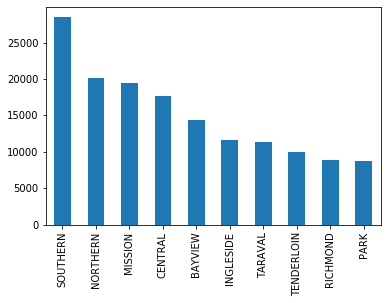

In [37]:
dist.plot(kind = 'bar');

# Resolution

In [38]:
# is there a way to combine everything that isnt none, 'arrest, booked', into another category called other?

In [39]:
res = df['Resolution']

In [40]:
res.value_counts()

NONE                                      107780
ARREST, BOOKED                             39416
UNFOUNDED                                   1608
JUVENILE BOOKED                             1056
EXCEPTIONAL CLEARANCE                        371
ARREST, CITED                                144
CLEARED-CONTACT JUVENILE FOR MORE INFO        58
NOT PROSECUTED                                22
LOCATED                                       20
PSYCHOPATHIC CASE                             17
JUVENILE CITED                                 3
JUVENILE DIVERTED                              2
COMPLAINANT REFUSES TO PROSECUTE               2
PROSECUTED BY OUTSIDE AGENCY                   1
Name: Resolution, dtype: int64

In [41]:
reso = res.value_counts().head(2)

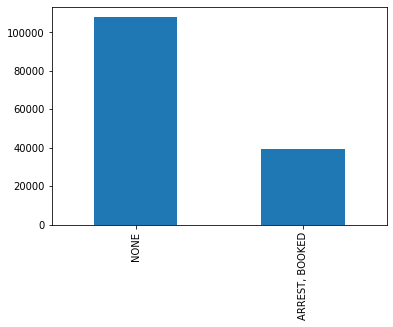

In [42]:
reso.plot(kind = 'bar');

# Amount of Crimes Per Month

Total amount of crimes in January: 12946


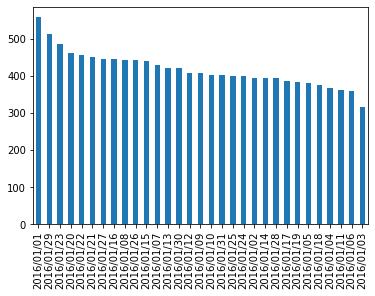

In [43]:
filtdf1 = df[(df['Date'] >= '2016/01/01') & (df['Date'] <='2016/01/31')]
filtdf1['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in January:", filtdf1['Date'].value_counts().sum())

# January
# Top 3 days for crime:
# Jan 1, 29, 23
# Lowest 3 days for crime:
# Jan 11, 6, 3

Total amount of crimes in February: 12092


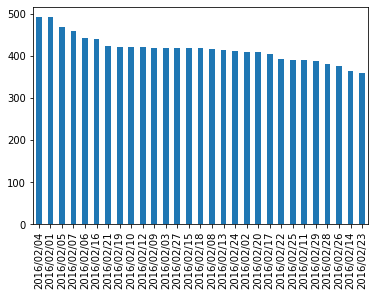

In [44]:
filtdf2 = df[(df['Date'] >= '2016/02/01') & (df['Date'] <='2016/02/31')]
filtdf2['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in February:", filtdf2['Date'].value_counts().sum())

# February
# Top 3 days for crime:
# Feb 1, 4, 7
# Lowest 3 days for crime:
# Feb 26, 14, 23

Total amount of crimes in March: 12362


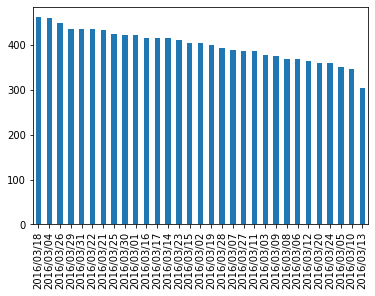

In [45]:
filtdf3 = df[(df['Date'] >= '2016/03/01') & (df['Date'] <='2016/03/31')]
filtdf3['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in March:", filtdf3['Date'].value_counts().sum())


# March
# Top 3 days for crime:
# Mar 18, 4, 26
# Lowest 3 days for crime:
# Mar 5, 10, 13

Total amount of crimes in April: 12317


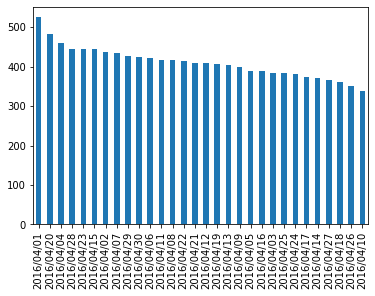

In [46]:
filtdf4 = df[(df['Date'] >= '2016/04/01') & (df['Date'] <='2016/04/31')]
filtdf4['Date'].value_counts().plot(kind = 'bar');
print("Total amount of crimes in April:", filtdf4['Date'].value_counts().sum())

# April
# Top 3 days for crime:
# Apr 1, 20, 4
# Lowest 3 days for crime:
# Apr 18, 26, 10

In [47]:
# # to save space I have written the code but I have not entered it
# # May
# filtdf5 = df[(df['Date'] >= '2016/05/01') & (df['Date'] <='2016/05/31')]
# filtdf5['Date'].value_counts().plot(kind = 'bar');
# # June
# filtdf6 = df[(df['Date'] >= '2016/06/01') & (df['Date'] <='2016/06/31')]
# filtdf6['Date'].value_counts().plot(kind = 'bar');
# # July
# filtdf7 = df[(df['Date'] >= '2016/07/01') & (df['Date'] <='2016/07/31')]
# filtdf7['Date'].value_counts().plot(kind = 'bar');
# # August
# filtdf8 = df[(df['Date'] >= '2016/08/01') & (df['Date'] <='2016/08/31')]
# filtdf8['Date'].value_counts().plot(kind = 'bar');
# # September
# filtdf9 = df[(df['Date'] >= '2016/09/01') & (df['Date'] <='2016/09/31')]
# filtdf9['Date'].value_counts().plot(kind = 'bar');
# # October
# filtdf10 = df[(df['Date'] >= '2016/10/01') & (df['Date'] <='2016/10/31')]
# filtdf10['Date'].value_counts().plot(kind = 'bar');
# # November
# filtdf11 = df[(df['Date'] >= '2016/11/01') & (df['Date'] <='2016/11/31')]
# filtdf11['Date'].value_counts().plot(kind = 'bar');
# # December
# filtdf12 = df[(df['Date'] >= '2016/12/01') & (df['Date'] <='2016/12/31')]
# filtdf12['Date'].value_counts().plot(kind = 'bar');

# Time Series Analysis

In [48]:
# in order to fully understand crime within san francisco, i will perform a time series analysis. 
# importing necessary packages
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [49]:
# setting the algorithms to usable names
le = LabelEncoder()
lr = LinearRegression()

In [50]:
# dropping unnecessary columns
ts = df.drop(['Address', 'Lat', 'Lon'], axis = 1)

In [51]:
# getting the time in a usable format
ts['Date'] = pd.to_datetime(df['Date'])

In [52]:
ts['Date'] = ts['Date'].dt.strftime('%Y/%m/%d')

In [53]:
# in order to graph our time series we will need to turn the categorical data into numbers
labelcat = le.fit_transform(ts['Category'])

# this is the code for the other categorical data that the user can use to make different time series with
# labelday = le.fit_transform(ts['DayOfWeek'])
# labelpd = le.fit_transform(ts['PdDistrict'])
# labelres = le.fit_transform(ts['Resolution'])

In [54]:
# making sure that the label encoding worked
labelcat

array([21,  1, 35, ..., 20, 20, 20])

In [55]:
# the classes within the label endoded column
le.classes_

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES, FORCIBLE',
       'SEX OFFENSES, NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [56]:
# resetting the data frame so that our category column is label encoded
ts['Category'] = labelcat
# ts['DayOfWeek'] = labelday
# ts['PdDistrict'] = labelpd
# ts['Resolution'] = labelres

In [57]:
# making sure that it worked
ts.head(2)

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution
139947,21,MISCELLANEOUS INVESTIGATION,Friday,2016/01/01,00:01,TARAVAL,NONE
26883,1,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",Friday,2016/01/01,00:09,MISSION,NONE


In [58]:
# checking out the data types and missing values
ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150500 entries, 139947 to 149155
Data columns (total 7 columns):
Category      150500 non-null int64
Descript      150500 non-null object
DayOfWeek     150500 non-null object
Date          150500 non-null object
Time          150500 non-null object
PdDistrict    150500 non-null object
Resolution    150500 non-null object
dtypes: int64(1), object(6)
memory usage: 9.2+ MB


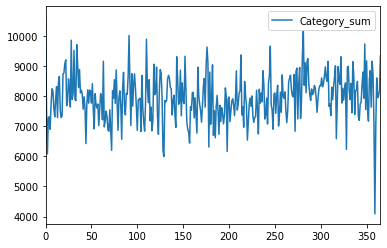

In [59]:
# this is a graph of the amount of crimes happening per day over the course of a year. 
grouped_single = ts.groupby('Date').agg({'Category': ['sum']})

# rename columns
grouped_single.columns = ['Category_sum']

# reset index to get grouped columns back
grouped_single = grouped_single.reset_index()

# grouped_single.head()
grouped_single.plot();


In [60]:
# again, this is the code for any other time series that might want to be looked at
# grouped_single1 = ts.groupby('Date').agg({'DayOfWeek': ['sum']})
# grouped_single2 = ts.groupby('Date').agg({'PdDistrict': ['sum']})
# grouped_single3 = ts.groupby('Date').agg({'Resolution': ['sum']})

# grouped_single1.plot();
# grouped_single2.plot();
# grouped_single3.plot();


In [61]:
# checking to see if it worked
grouped_single.head()

,Date,Category_sum
0,2016/01/01,10650
1,2016/01/02,7556
2,2016/01/03,6085
3,2016/01/04,7278
4,2016/01/05,7314


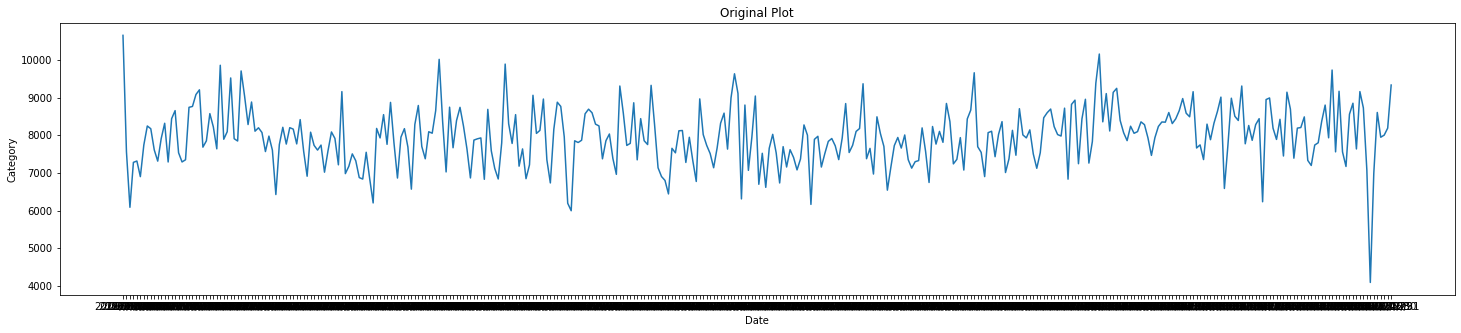

In [62]:
# there is so much data that the labels are cluttered. 
# The dates range from 1/1/2016-12/1/2016.
fig = plt.figure(figsize = (25,5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Date')
ax1.set_ylabel('Category')
ax1.set_title('Original Plot')
ax1.plot('Date', 'Category_sum', data = grouped_single);

In [63]:
# there is a lot of data to go over in this data set. I wanted to see what it would look like with only 75% of the data
one_ten = grouped_single.sample(frac = .75, random_state = np.random.randint(100))

In [64]:
# checking to see if it worked
one_ten.head()

,Date,Category_sum
114,2016/04/24,7177
191,2016/07/10,7155
211,2016/07/30,8099
141,2016/05/21,7381
325,2016/11/21,7863


In [65]:
# here we can see there is far less data than before
one_ten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 114 to 14
Data columns (total 2 columns):
Date            274 non-null object
Category_sum    274 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.4+ KB


In [66]:
one_ten.index.name = None
one_ten = one_ten.sort_values(by = ['Date'], ascending = True)
one_ten.head()

,Date,Category_sum
0,2016/01/01,10650
1,2016/01/02,7556
2,2016/01/03,6085
3,2016/01/04,7278
4,2016/01/05,7314


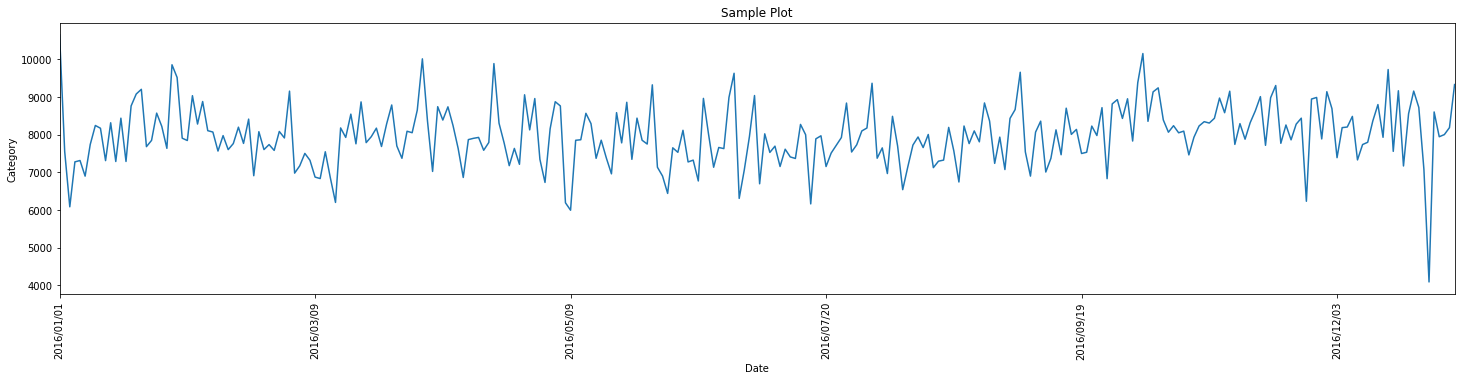

In [67]:
axes = one_ten.plot('Date', 'Category_sum', legend = False, title = 'Sample Plot', figsize = (25,5));
axes.legend = None
axes.set_ylabel('Category')
plt.xticks(rotation = 90);


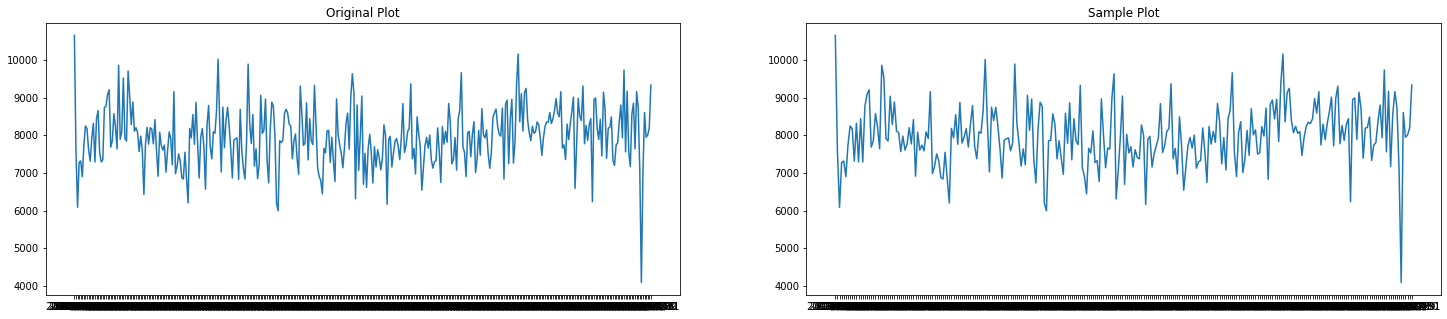

In [68]:
# plotting the two graphs side by side
# there is 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (25,5));
axes[0].plot('Date', 'Category_sum', data = grouped_single);
axes[0].set_title('Original Plot');
axes[1].plot('Date', 'Category_sum', data = one_ten);
axes[1].set_title('Sample Plot');

In [69]:
# grouped_single = grouped_single.reset_index()
grouped_single.head()

,Date,Category_sum
0,2016/01/01,10650
1,2016/01/02,7556
2,2016/01/03,6085
3,2016/01/04,7278
4,2016/01/05,7314


In [70]:
grouped_single['Rolling Mean'] = grouped_single['Category_sum'].rolling(window = 30).mean()
grouped_single.head()

,Date,Category_sum,Rolling Mean
0,2016/01/01,10650,NaN
1,2016/01/02,7556,NaN
2,2016/01/03,6085,NaN
3,2016/01/04,7278,NaN
4,2016/01/05,7314,NaN


In [71]:
grouped_single.dropna(inplace = True)

In [72]:
grouped_single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 29 to 365
Data columns (total 3 columns):
Date            337 non-null object
Category_sum    337 non-null int64
Rolling Mean    337 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.5+ KB


In [73]:
grouped_single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 29 to 365
Data columns (total 3 columns):
Date            337 non-null object
Category_sum    337 non-null int64
Rolling Mean    337 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.5+ KB


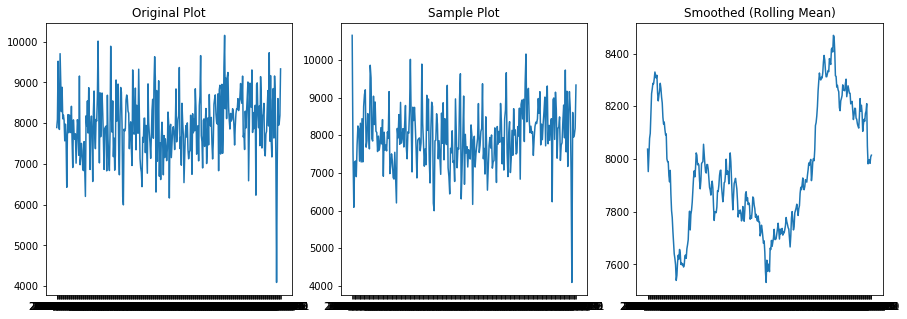

In [74]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
axes[0].plot('Date', 'Category_sum', data = grouped_single);
axes[0].set_title('Original Plot');
axes[1].plot('Date', 'Category_sum', data = one_ten);
axes[1].set_title('Sample Plot');
axes[2].plot('Date', 'Rolling Mean', data = grouped_single);
axes[2].set_title('Smoothed (Rolling Mean)');

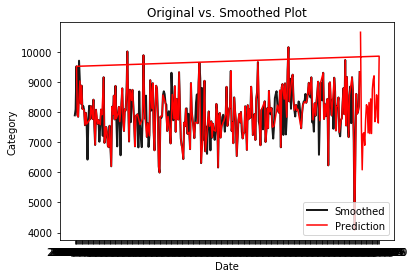

In [75]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(grouped_single['Date'], grouped_single['Category_sum'], color = (0, 0, 0), linewidth = 2, alpha = .9, label = 'Smoothed');
ax.plot(one_ten['Date'], one_ten['Category_sum'], color = (1, 0, 0), label = 'Prediction');
ax.set_title('Original vs. Smoothed Plot');
ax.set_xlabel('Date');
ax.set_ylabel('Category');
ax.legend(loc = 'lower right');

In [76]:
grouped_single.head()

,Date,Category_sum,Rolling Mean
29,2016/01/30,7892,8037.433333
30,2016/01/31,8092,7952.166667
31,2016/02/01,9519,8017.600000
32,2016/02/02,7906,8078.300000
33,2016/02/03,7845,8097.200000


In [77]:
grouped_single['Date'] = pd.to_datetime(grouped_single['Date'])

In [78]:
# equation of the line

group = lr.fit(grouped_single[['Date']], grouped_single[['Category_sum']])
m = group.coef_[0]
b = group.intercept_

print('y = ', round(m[0],2), 'x + ', round(b[0],2))

y =  0.0 x +  -9707.24


In [79]:
predictions = group.predict(grouped_single[['Category_sum']])
predictions[0:5]

array([[-9707.23914518],
       [-9707.23914518],
       [-9707.23914518],
       [-9707.23914518],
       [-9707.23914518]])

In [80]:
predictions = pd.DataFrame(data = predictions, index = grouped_single.index.values, columns = ['Predict'])
predictions.head()

,Predict
29,-9707.239145
30,-9707.239145
31,-9707.239145
32,-9707.239145
33,-9707.239145


In [81]:
joined_df = grouped_single.join(predictions, how = 'inner')
joined_df.head()

,Date,Category_sum,Rolling Mean,Predict
29,2016-01-30,7892,8037.433333,-9707.239145
30,2016-01-31,8092,7952.166667,-9707.239145
31,2016-02-01,9519,8017.600000,-9707.239145
32,2016-02-02,7906,8078.300000,-9707.239145
33,2016-02-03,7845,8097.200000,-9707.239145


In [82]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 29 to 365
Data columns (total 4 columns):
Date            337 non-null datetime64[ns]
Category_sum    337 non-null int64
Rolling Mean    337 non-null float64
Predict         337 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 23.2 KB


In [83]:
# joined_df.drop(columns = ['level_0', 'index'])

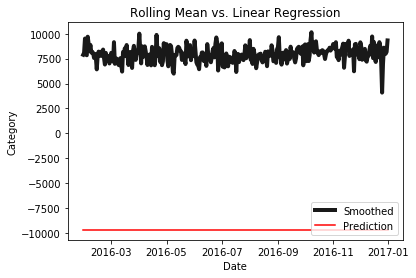

In [84]:
fig = plt.figure();
ax = fig.add_subplot();
ax.plot(joined_df['Date'], joined_df['Category_sum'], color = (0, 0, 0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(joined_df['Date'], joined_df['Predict'], color = (1, 0, 0), label = 'Prediction');
ax.set_title('Rolling Mean vs. Linear Regression');
ax.set_xlabel('Date');
ax.set_ylabel('Category');
ax.legend(loc = 'lower right');


# @Victor, why is the red bar so low????!!!!

In [85]:
decomp = grouped_single

In [86]:
#Additvie is used when seasonality variation is constant over time
decomp = decomp.set_index('Date')
df_decomp = sm.tsa.seasonal_decompose(decomp, model='additive')

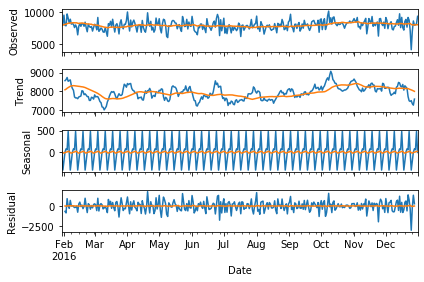

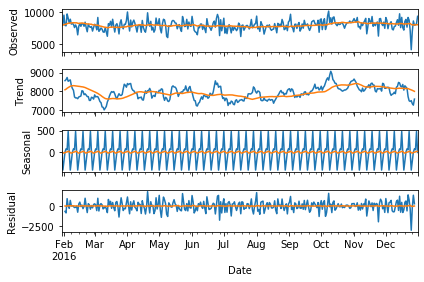

In [87]:
df_decomp.plot()

In [ ]:
# @Victor, please let me know what i can fix/change so i can be ready for friday!